<a href="https://colab.research.google.com/github/mimiflynn/covid-data/blob/master/covid_jhu_csse.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
# !apt-get -qq install python-cartopy python3-cartopy

In [2]:
# import cartopy.crs as ccrs
import json
from datetime import datetime
from datetime import timedelta
import matplotlib.pyplot as plt
import requests as request
import pandas as pd
import numpy as np
plt.close('all')
plt.xkcd()

In [0]:
# run all requests for summary
api = request.get('https://covid19.mathdro.id/api')
confirmed = request.get('https://covid19.mathdro.id/api/confirmed')
deaths = request.get('https://covid19.mathdro.id/api/deaths')
us_confirmed = request.get('https://covid19.mathdro.id/api/countries/USA/confirmed')
ph_confirmed = request.get('https://covid19.mathdro.id/api/countries/Philippines/confirmed')

In [4]:
today = datetime.today()
print('Last run at:')
print(today)

Last run at:
2020-05-13 14:06:34.104380


In [0]:
# state population data from https://datausa.io/api/data?drilldowns=State&measures=Population&year=latest
# included here as string because no reason to make calls on 2 year old data
us_pop = '[{"ID State":"04000US30","State":"Montana","ID Year":2018,"Year":"2018","Population":1062305,"Slug State":"montana"},{"ID State":"04000US01","State":"Alabama","ID Year":2018,"Year":"2018","Population":4887871,"Slug State":"alabama"},{"ID State":"04000US04","State":"Arizona","ID Year":2018,"Year":"2018","Population":7171646,"Slug State":"arizona"},{"ID State":"04000US05","State":"Arkansas","ID Year":2018,"Year":"2018","Population":3013825,"Slug State":"arkansas"},{"ID State":"04000US06","State":"California","ID Year":2018,"Year":"2018","Population":39557045,"Slug State":"california"},{"ID State":"04000US08","State":"Colorado","ID Year":2018,"Year":"2018","Population":5695564,"Slug State":"colorado"},{"ID State":"04000US09","State":"Connecticut","ID Year":2018,"Year":"2018","Population":3572665,"Slug State":"connecticut"},{"ID State":"04000US10","State":"Delaware","ID Year":2018,"Year":"2018","Population":967171,"Slug State":"delaware"},{"ID State":"04000US11","State":"District of Columbia","ID Year":2018,"Year":"2018","Population":702455,"Slug State":"district-of-columbia"},{"ID State":"04000US12","State":"Florida","ID Year":2018,"Year":"2018","Population":21299325,"Slug State":"florida"},{"ID State":"04000US13","State":"Georgia","ID Year":2018,"Year":"2018","Population":10519475,"Slug State":"georgia"},{"ID State":"04000US15","State":"Hawaii","ID Year":2018,"Year":"2018","Population":1420491,"Slug State":"hawaii"},{"ID State":"04000US16","State":"Idaho","ID Year":2018,"Year":"2018","Population":1754208,"Slug State":"idaho"},{"ID State":"04000US17","State":"Illinois","ID Year":2018,"Year":"2018","Population":12741080,"Slug State":"illinois"},{"ID State":"04000US18","State":"Indiana","ID Year":2018,"Year":"2018","Population":6691878,"Slug State":"indiana"},{"ID State":"04000US19","State":"Iowa","ID Year":2018,"Year":"2018","Population":3156145,"Slug State":"iowa"},{"ID State":"04000US20","State":"Kansas","ID Year":2018,"Year":"2018","Population":2911510,"Slug State":"kansas"},{"ID State":"04000US21","State":"Kentucky","ID Year":2018,"Year":"2018","Population":4468402,"Slug State":"kentucky"},{"ID State":"04000US22","State":"Louisiana","ID Year":2018,"Year":"2018","Population":4659978,"Slug State":"louisiana"},{"ID State":"04000US23","State":"Maine","ID Year":2018,"Year":"2018","Population":1338404,"Slug State":"maine"},{"ID State":"04000US24","State":"Maryland","ID Year":2018,"Year":"2018","Population":6042718,"Slug State":"maryland"},{"ID State":"04000US25","State":"Massachusetts","ID Year":2018,"Year":"2018","Population":6902149,"Slug State":"massachusetts"},{"ID State":"04000US26","State":"Michigan","ID Year":2018,"Year":"2018","Population":9995915,"Slug State":"michigan"},{"ID State":"04000US27","State":"Minnesota","ID Year":2018,"Year":"2018","Population":5611179,"Slug State":"minnesota"},{"ID State":"04000US28","State":"Mississippi","ID Year":2018,"Year":"2018","Population":2986530,"Slug State":"mississippi"},{"ID State":"04000US29","State":"Missouri","ID Year":2018,"Year":"2018","Population":6126452,"Slug State":"missouri"},{"ID State":"04000US02","State":"Alaska","ID Year":2018,"Year":"2018","Population":737438,"Slug State":"alaska"},{"ID State":"04000US31","State":"Nebraska","ID Year":2018,"Year":"2018","Population":1929268,"Slug State":"nebraska"},{"ID State":"04000US32","State":"Nevada","ID Year":2018,"Year":"2018","Population":3034392,"Slug State":"nevada"},{"ID State":"04000US33","State":"New Hampshire","ID Year":2018,"Year":"2018","Population":1356458,"Slug State":"new-hampshire"},{"ID State":"04000US34","State":"New Jersey","ID Year":2018,"Year":"2018","Population":8908520,"Slug State":"new-jersey"},{"ID State":"04000US35","State":"New Mexico","ID Year":2018,"Year":"2018","Population":2095428,"Slug State":"new-mexico"},{"ID State":"04000US36","State":"New York","ID Year":2018,"Year":"2018","Population":19542209,"Slug State":"new-york"},{"ID State":"04000US37","State":"North Carolina","ID Year":2018,"Year":"2018","Population":10383620,"Slug State":"north-carolina"},{"ID State":"04000US38","State":"North Dakota","ID Year":2018,"Year":"2018","Population":760077,"Slug State":"north-dakota"},{"ID State":"04000US39","State":"Ohio","ID Year":2018,"Year":"2018","Population":11689442,"Slug State":"ohio"},{"ID State":"04000US40","State":"Oklahoma","ID Year":2018,"Year":"2018","Population":3943079,"Slug State":"oklahoma"},{"ID State":"04000US41","State":"Oregon","ID Year":2018,"Year":"2018","Population":4190713,"Slug State":"oregon"},{"ID State":"04000US42","State":"Pennsylvania","ID Year":2018,"Year":"2018","Population":12807060,"Slug State":"pennsylvania"},{"ID State":"04000US44","State":"Rhode Island","ID Year":2018,"Year":"2018","Population":1057315,"Slug State":"rhode-island"},{"ID State":"04000US45","State":"South Carolina","ID Year":2018,"Year":"2018","Population":5084127,"Slug State":"south-carolina"},{"ID State":"04000US46","State":"South Dakota","ID Year":2018,"Year":"2018","Population":882235,"Slug State":"south-dakota"},{"ID State":"04000US47","State":"Tennessee","ID Year":2018,"Year":"2018","Population":6770010,"Slug State":"tennessee"},{"ID State":"04000US48","State":"Texas","ID Year":2018,"Year":"2018","Population":28701845,"Slug State":"texas"},{"ID State":"04000US49","State":"Utah","ID Year":2018,"Year":"2018","Population":3161105,"Slug State":"utah"},{"ID State":"04000US50","State":"Vermont","ID Year":2018,"Year":"2018","Population":626299,"Slug State":"vermont"},{"ID State":"04000US51","State":"Virginia","ID Year":2018,"Year":"2018","Population":8517685,"Slug State":"virginia"},{"ID State":"04000US53","State":"Washington","ID Year":2018,"Year":"2018","Population":7535591,"Slug State":"washington"},{"ID State":"04000US54","State":"West Virginia","ID Year":2018,"Year":"2018","Population":1805832,"Slug State":"west-virginia"},{"ID State":"04000US55","State":"Wisconsin","ID Year":2018,"Year":"2018","Population":5813568,"Slug State":"wisconsin"},{"ID State":"04000US56","State":"Wyoming","ID Year":2018,"Year":"2018","Population":577737,"Slug State":"wyoming"},{"ID State":"04000US72","State":"Puerto Rico","ID Year":2018,"Year":"2018","Population":3195153,"Slug State":"puerto-rico"}]'
pop = pd.DataFrame.from_dict(json.loads(us_pop))

In [0]:
def state_chart(deaths_perc_of_confirmed):
    labels = 'Confirmed', 'Deaths'
    sizes = [100 - deaths_perc_of_confirmed, deaths_perc_of_confirmed]
    explode = (0, 0.1)

    fig1, ax1 = plt.subplots()
    ax1.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%',
            shadow=True, startangle=90)
    ax1.axis('equal')

    plt.show()

In [0]:
def state_details(state_name):
    state = us.loc[us['provinceState'] == state_name]
    p = pop.loc[pop['State'] == state_name]

    population = p['Population'].sum()
    confirmed = state['confirmed'].sum()
    deaths = state['deaths'].sum()

    confirmed_perc_of_pop = (confirmed/population) * 100
    deaths_perc_of_confirmed = (deaths/confirmed) * 100

    state_chart(deaths_perc_of_confirmed)

    print('{0} State Total Population'.format(state_name))
    print(p['Population'].sum())
    print('{0} State Confirmed'.format(state_name))
    print('{0} ({1}% of population)'.format(confirmed, confirmed_perc_of_pop))
    print('{0} State Deaths'.format(state_name))
    print('{0} ({1}% of confirmed)'.format(deaths, deaths_perc_of_confirmed))
    print('')

In [0]:
# All States
states = pop['State'].tolist()
states.sort()

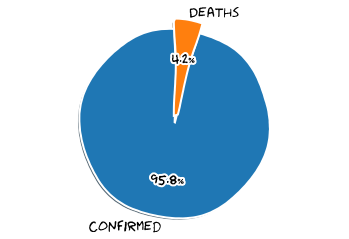

Alabama State Total Population
4887871
Alabama State Confirmed
10468 (0.21416277148067123% of population)
Alabama State Deaths
440 (4.203286205578907% of confirmed)



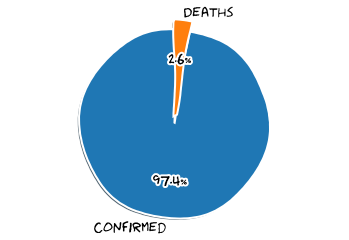

Alaska State Total Population
737438
Alaska State Confirmed
383 (0.051936569582798825% of population)
Alaska State Deaths
10 (2.610966057441253% of confirmed)



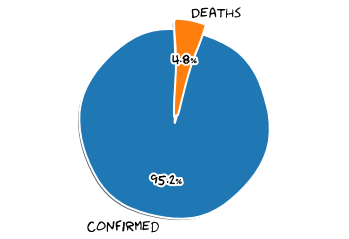

Arizona State Total Population
7171646
Arizona State Confirmed
11736 (0.16364444089962052% of population)
Arizona State Deaths
561 (4.7801635991820035% of confirmed)



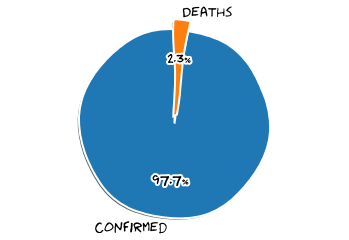

Arkansas State Total Population
3013825
Arkansas State Confirmed
4089 (0.1356747654558576% of population)
Arkansas State Deaths
94 (2.2988505747126435% of confirmed)



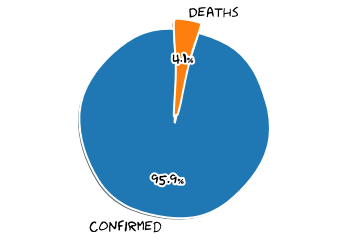

California State Total Population
39557045
California State Confirmed
71047 (0.179606439257533% of population)
California State Deaths
2882 (4.056469660928681% of confirmed)



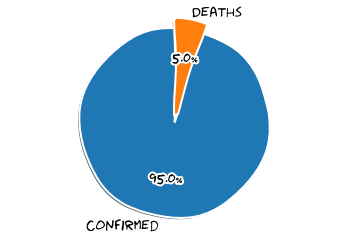

Colorado State Total Population
5695564
Colorado State Confirmed
20157 (0.35390700552219234% of population)
Colorado State Deaths
1009 (5.005705214069554% of confirmed)



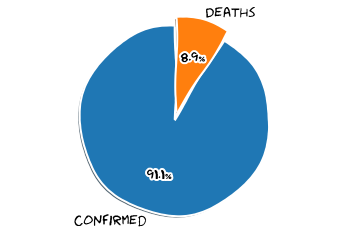

Connecticut State Total Population
3572665
Connecticut State Confirmed
34333 (0.9609913048102747% of population)
Connecticut State Deaths
3041 (8.85736754725774% of confirmed)



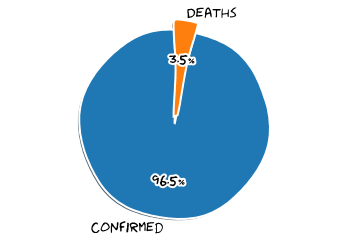

Delaware State Total Population
967171
Delaware State Confirmed
6741 (0.6969811956727404% of population)
Delaware State Deaths
237 (3.515798842901647% of confirmed)



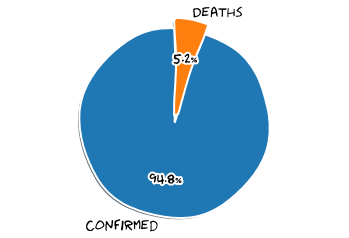

District of Columbia State Total Population
702455
District of Columbia State Confirmed
6485 (0.9231908093756895% of population)
District of Columbia State Deaths
336 (5.181187355435621% of confirmed)



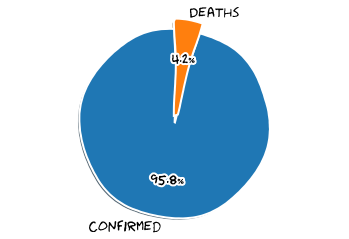

Florida State Total Population
21299325
Florida State Confirmed
41923 (0.19682783374590512% of population)
Florida State Deaths
1779 (4.243494024759679% of confirmed)



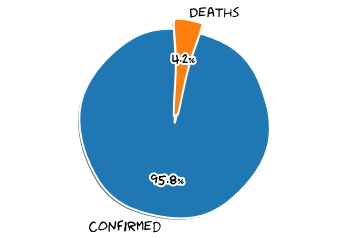

Georgia State Total Population
10519475
Georgia State Confirmed
35260 (0.33518783019114545% of population)
Georgia State Deaths
1495 (4.239931934203063% of confirmed)



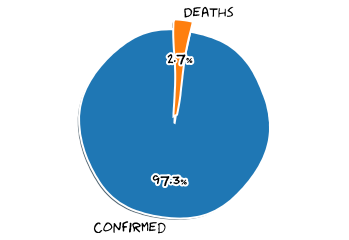

Hawaii State Total Population
1420491
Hawaii State Confirmed
635 (0.04470285274598713% of population)
Hawaii State Deaths
17 (2.677165354330709% of confirmed)



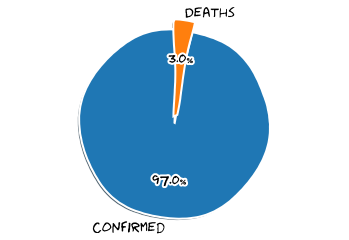

Idaho State Total Population
1754208
Idaho State Confirmed
2293 (0.13071425965449937% of population)
Idaho State Deaths
69 (3.009158307893589% of confirmed)



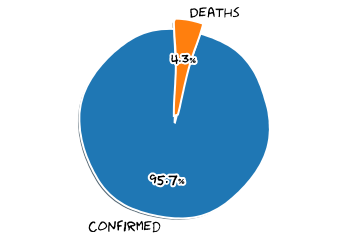

Illinois State Total Population
12741080
Illinois State Confirmed
83021 (0.6516009631836547% of population)
Illinois State Deaths
3601 (4.33745678804158% of confirmed)



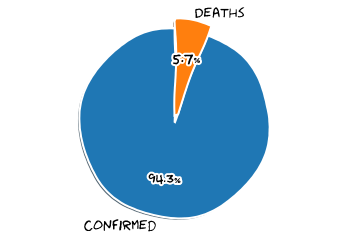

Indiana State Total Population
6691878
Indiana State Confirmed
25127 (0.37548502826859664% of population)
Indiana State Deaths
1444 (5.7468062243801485% of confirmed)



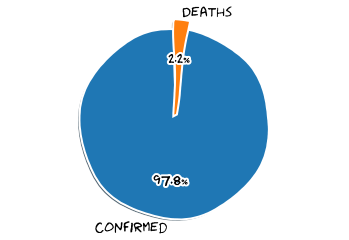

Iowa State Total Population
3156145
Iowa State Confirmed
12912 (0.4091066791924959% of population)
Iowa State Deaths
289 (2.2382280049566297% of confirmed)



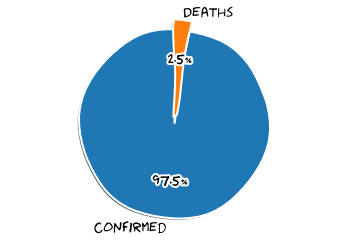

Kansas State Total Population
2911510
Kansas State Confirmed
7240 (0.24866821683593737% of population)
Kansas State Deaths
184 (2.541436464088398% of confirmed)



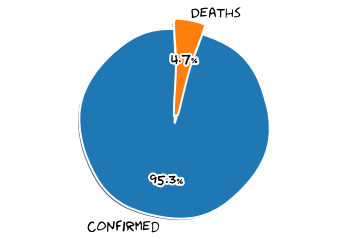

Kentucky State Total Population
4468402
Kentucky State Confirmed
6853 (0.15336578938063317% of population)
Kentucky State Deaths
321 (4.684079964978841% of confirmed)



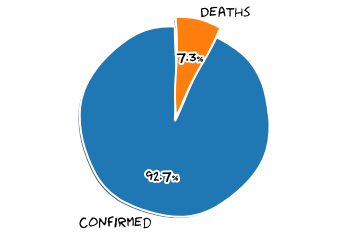

Louisiana State Total Population
4659978
Louisiana State Confirmed
32050 (0.6877714873332019% of population)
Louisiana State Deaths
2347 (7.322932917316692% of confirmed)



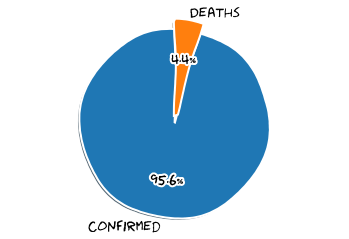

Maine State Total Population
1338404
Maine State Confirmed
1477 (0.11035531872289682% of population)
Maine State Deaths
65 (4.400812457684496% of confirmed)



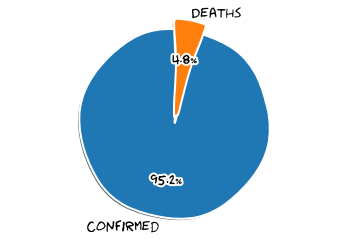

Maryland State Total Population
6042718
Maryland State Confirmed
34061 (0.5636701894743392% of population)
Maryland State Deaths
1647 (4.835442294706556% of confirmed)



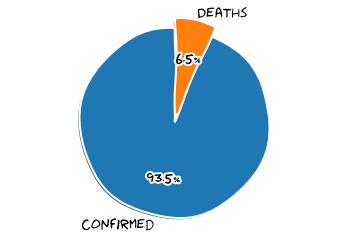

Massachusetts State Total Population
6902149
Massachusetts State Confirmed
79332 (1.1493811565064735% of population)
Massachusetts State Deaths
5141 (6.480361014470831% of confirmed)



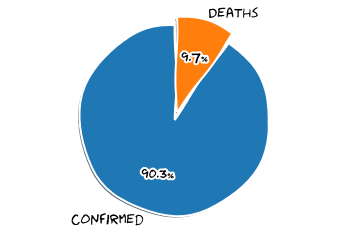

Michigan State Total Population
9995915
Michigan State Confirmed
48021 (0.48040624595147113% of population)
Michigan State Deaths
4674 (9.733241706753295% of confirmed)



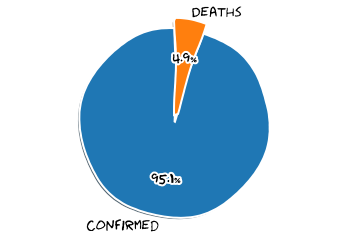

Minnesota State Total Population
5611179
Minnesota State Confirmed
12494 (0.2226626525370158% of population)
Minnesota State Deaths
614 (4.9143588922682895% of confirmed)



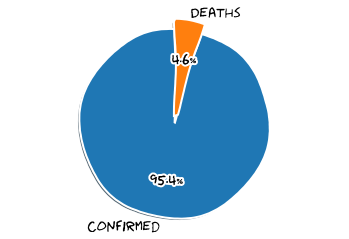

Mississippi State Total Population
2986530
Mississippi State Confirmed
9908 (0.3317562522392208% of population)
Mississippi State Deaths
457 (4.612434396447315% of confirmed)



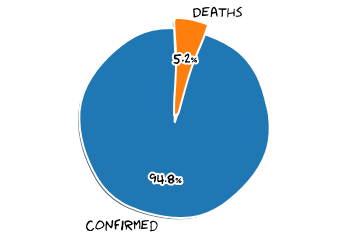

Missouri State Total Population
6126452
Missouri State Confirmed
10255 (0.16738889001333887% of population)
Missouri State Deaths
530 (5.168210628961482% of confirmed)



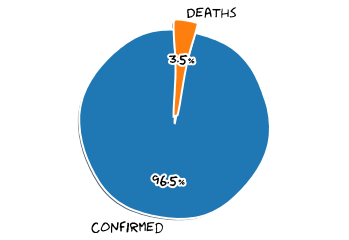

Montana State Total Population
1062305
Montana State Confirmed
461 (0.04339619977313484% of population)
Montana State Deaths
16 (3.470715835140998% of confirmed)



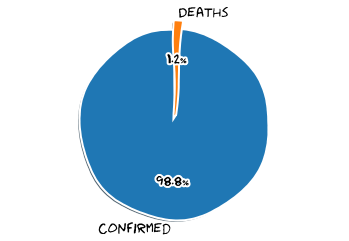

Nebraska State Total Population
1929268
Nebraska State Confirmed
8692 (0.4505335702452951% of population)
Nebraska State Deaths
103 (1.1849976990335942% of confirmed)



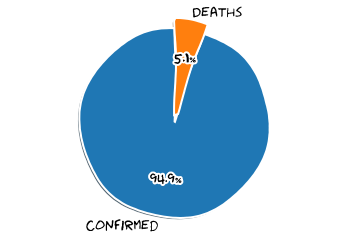

Nevada State Total Population
3034392
Nevada State Confirmed
6311 (0.20798235692685718% of population)
Nevada State Deaths
321 (5.086357154175249% of confirmed)



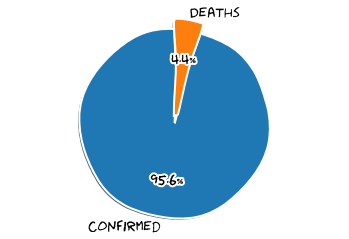

New Hampshire State Total Population
1356458
New Hampshire State Confirmed
3239 (0.2387836556679234% of population)
New Hampshire State Deaths
142 (4.384069157147268% of confirmed)



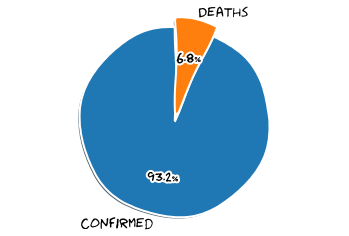

New Jersey State Total Population
8908520
New Jersey State Confirmed
140917 (1.5818227943586587% of population)
New Jersey State Deaths
9531 (6.7635558520263706% of confirmed)



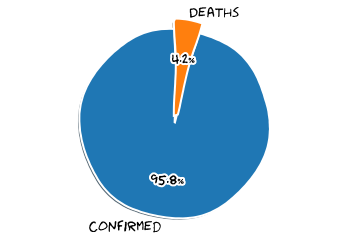

New Mexico State Total Population
2095428
New Mexico State Confirmed
5212 (0.24873200129042847% of population)
New Mexico State Deaths
219 (4.201841903300077% of confirmed)



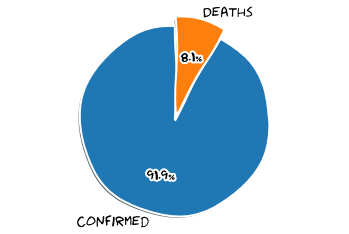

New York State Total Population
19542209
New York State Confirmed
338485 (1.7320713333891784% of population)
New York State Deaths
27284 (8.060623070446253% of confirmed)



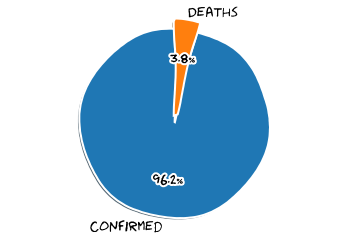

North Carolina State Total Population
10383620
North Carolina State Confirmed
15624 (0.15046775594638478% of population)
North Carolina State Deaths
600 (3.840245775729647% of confirmed)



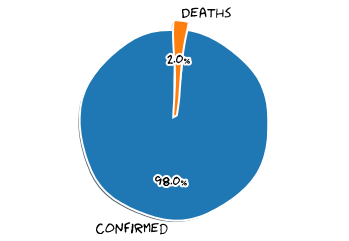

North Dakota State Total Population
760077
North Dakota State Confirmed
1571 (0.20668958539726895% of population)
North Dakota State Deaths
32 (2.0369191597708465% of confirmed)



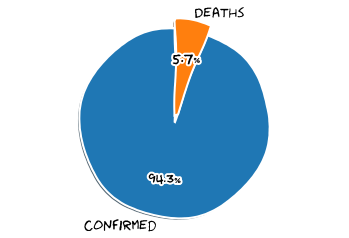

Ohio State Total Population
11689442
Ohio State Confirmed
25250 (0.21600688895158554% of population)
Ohio State Deaths
1436 (5.687128712871288% of confirmed)



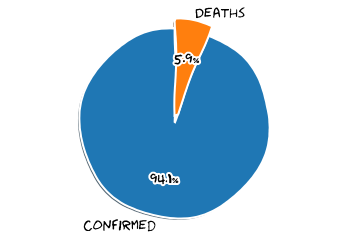

Oklahoma State Total Population
3943079
Oklahoma State Confirmed
4732 (0.12000774014418682% of population)
Oklahoma State Deaths
278 (5.874894336432798% of confirmed)



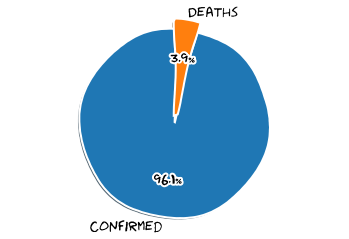

Oregon State Total Population
4190713
Oregon State Confirmed
3358 (0.08012956267823639% of population)
Oregon State Deaths
130 (3.871351995235259% of confirmed)



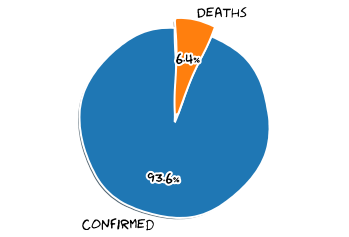

Pennsylvania State Total Population
12807060
Pennsylvania State Confirmed
61310 (0.47872033081753346% of population)
Pennsylvania State Deaths
3914 (6.3839504159191% of confirmed)



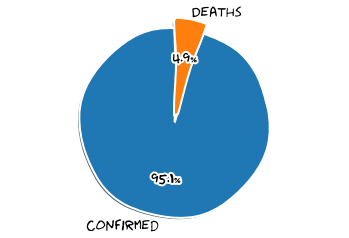

Puerto Rico State Total Population
3195153
Puerto Rico State Confirmed
2329 (0.07289165808335313% of population)
Puerto Rico State Deaths
115 (4.937741519965651% of confirmed)



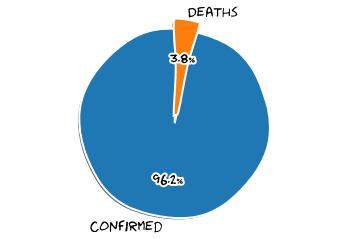

Rhode Island State Total Population
1057315
Rhode Island State Confirmed
11614 (1.0984427535786403% of population)
Rhode Island State Deaths
444 (3.8229722748407093% of confirmed)



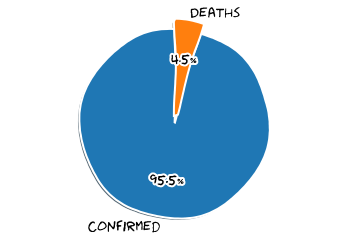

South Carolina State Total Population
5084127
South Carolina State Confirmed
7927 (0.15591664016260806% of population)
South Carolina State Deaths
355 (4.478365081367478% of confirmed)



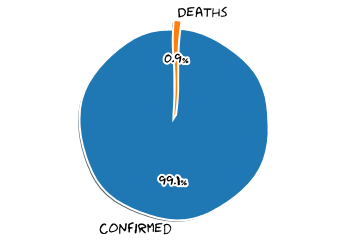

South Dakota State Total Population
882235
South Dakota State Confirmed
3663 (0.4151954977982057% of population)
South Dakota State Deaths
34 (0.9282009282009281% of confirmed)



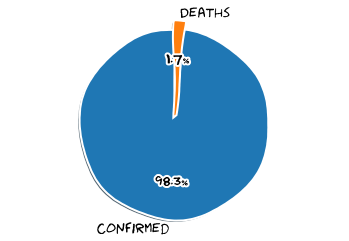

Tennessee State Total Population
6770010
Tennessee State Confirmed
16111 (0.2379760148064774% of population)
Tennessee State Deaths
266 (1.6510458692818573% of confirmed)



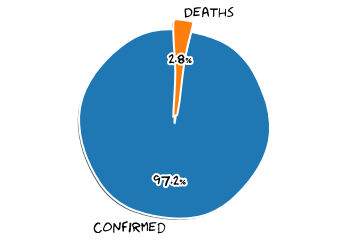

Texas State Total Population
28701845
Texas State Confirmed
41733 (0.14540180256704752% of population)
Texas State Deaths
1151 (2.758009249275154% of confirmed)



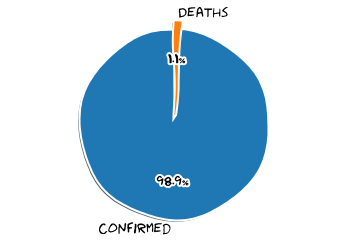

Utah State Total Population
3161105
Utah State Confirmed
6432 (0.20347315258430204% of population)
Utah State Deaths
73 (1.1349502487562189% of confirmed)



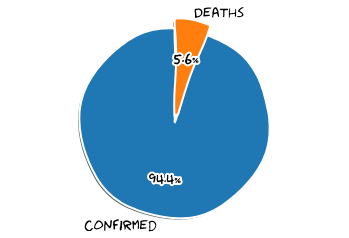

Vermont State Total Population
626299
Vermont State Confirmed
1002 (0.1599874820173751% of population)
Vermont State Deaths
56 (5.588822355289421% of confirmed)



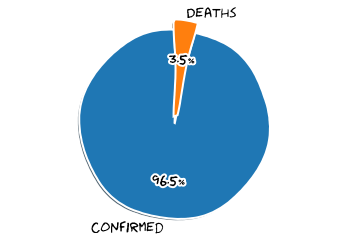

Virginia State Total Population
8517685
Virginia State Confirmed
25800 (0.30289920324595243% of population)
Virginia State Deaths
892 (3.4573643410852712% of confirmed)



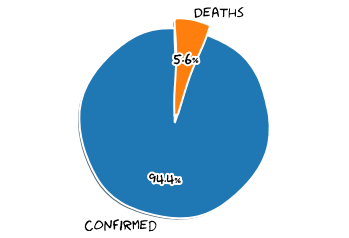

Washington State Total Population
7535591
Washington State Confirmed
17330 (0.2299753264209801% of population)
Washington State Deaths
962 (5.551067512983266% of confirmed)



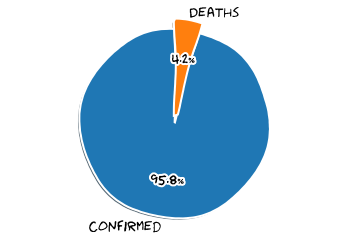

West Virginia State Total Population
1805832
West Virginia State Confirmed
1378 (0.07630831660974% of population)
West Virginia State Deaths
58 (4.2089985486211905% of confirmed)



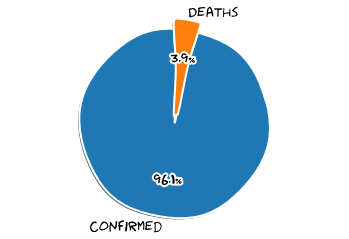

Wisconsin State Total Population
5813568
Wisconsin State Confirmed
10611 (0.18252130189240068% of population)
Wisconsin State Deaths
418 (3.9393082650080102% of confirmed)



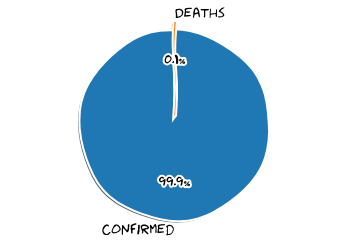

Wyoming State Total Population
577737
Wyoming State Confirmed
675 (0.1168351689436543% of population)
Wyoming State Deaths
1 (0.14814814814814814% of confirmed)



In [9]:
us = pd.DataFrame.from_dict(us_confirmed.json())

for i in states:
    state_details(i)

In [10]:
# quick summary
print('US Confirmed')
print(us['confirmed'].sum())
print('US Deaths')
print(us['deaths'].sum())
print('')

ny = us.loc[us['provinceState'] == 'New York']
nyc = ny.loc[ny['admin2'] == 'New York City']
print('New York City Confirmed')
print(nyc['confirmed'].sum())
print('New York City Deaths')
print(nyc['deaths'].sum())
print('')

# create a dataframe of all comfirmed cases
global_confirmed = pd.DataFrame.from_dict(confirmed.json())

ph = global_confirmed.loc[global_confirmed['countryRegion'] == 'Philippines']
print('Philippines Confirmed')
print(ph['confirmed'].sum())
print('Philippines Deaths')
print(ph['deaths'].sum())
print('')

US Confirmed
1370460
US Deaths
82131

New York City Confirmed
186123
New York City Deaths
20237

Philippines Confirmed
11618
Philippines Deaths
772



In [11]:
# show api endpoints
api.json()

{'confirmed': {'detail': 'https://covid19.mathdro.id/api/confirmed',
  'value': 4291081},
 'countries': 'https://covid19.mathdro.id/api/countries',
 'countryDetail': {'example': 'https://covid19.mathdro.id/api/countries/USA',
  'pattern': 'https://covid19.mathdro.id/api/countries/[country]'},
 'dailySummary': 'https://covid19.mathdro.id/api/daily',
 'dailyTimeSeries': {'example': 'https://covid19.mathdro.id/api/daily/2-14-2020',
  'pattern': 'https://covid19.mathdro.id/api/daily/[dateString]'},
 'deaths': {'detail': 'https://covid19.mathdro.id/api/deaths',
  'value': 293157},
 'image': 'https://covid19.mathdro.id/api/og',
 'lastUpdate': '2020-05-13T13:32:28.000Z',
 'recovered': {'detail': 'https://covid19.mathdro.id/api/recovered',
  'value': 1507598},
 'source': 'https://github.com/mathdroid/covid19'}

In [0]:
# get date
yesterday = today - timedelta(days=1)
date = yesterday.strftime('%m-%d-%Y').lstrip('0').replace(' 0', '')

In [13]:
# Get yesterday's data
r = request.get('https://covid19.mathdro.id/api/daily/{}'.format(date))
print(r)
j = r.json()
df = pd.DataFrame.from_dict(j)
df

<Response [200]>


,fips,admin2,provinceState,countryRegion,lastUpdate,lat,long,confirmed,deaths,recovered,active,combinedKey
0,45001,Abbeville,South Carolina,US,2020-05-13 03:32:26,34.22333378,-82.46170658,34,0,0,34,"Abbeville, South Carolina, US"
1,22001,Acadia,Louisiana,US,2020-05-13 03:32:26,30.2950649,-92.41419698,152,11,0,141,"Acadia, Louisiana, US"
2,51001,Accomack,Virginia,US,2020-05-13 03:32:26,37.76707161,-75.63234615,530,7,0,523,"Accomack, Virginia, US"
3,16001,Ada,Idaho,US,2020-05-13 03:32:26,43.4526575,-116.24155159999998,744,21,0,723,"Ada, Idaho, US"
4,19001,Adair,Iowa,US,2020-05-13 03:32:26,41.33075609,-94.47105874,3,0,0,3,"Adair, Iowa, US"
...,...,...,...,...,...,...,...,...,...,...,...,...
3232,,,,West Bank and Gaza,2020-05-13 03:32:26,31.9522,35.2332,375,2,308,65,West Bank and Gaza
3233,,,,Western Sahara,2020-05-13 03:32:26,24.2155,-12.8858,6,0,6,0,Western Sahara
3234,,,,Yemen,2020-05-13 03:32:26,15.552727,48.516388,65,10,1,54,Yemen
3235,,,,Zambia,2020-05-13 03:32:26,-13.133897,27.849332,441,7,117,317,Zambia


In [14]:
# get all US confirmed cases
us = pd.DataFrame.from_dict(us_confirmed.json())
us

,provinceState,countryRegion,lastUpdate,lat,long,confirmed,recovered,deaths,active,admin2,fips,combinedKey,incidentRate,peopleTested,peopleHospitalized,uid,iso3
0,New York,US,1589376748000,40.767273,-73.971526,186123,0,20237,165886,New York City,36061,"New York City, New York, US",2232.542708,None,None,84036061,USA
1,Illinois,US,1589376748000,41.841448,-87.816588,55470,0,2449,53021,Cook,17031,"Cook, Illinois, US",1077.038650,None,None,84017031,USA
2,New York,US,1589376748000,40.740665,-73.589419,38434,0,1991,36443,Nassau,36059,"Nassau, New York, US",2832.435715,None,None,84036059,USA
3,New York,US,1589376748000,40.883201,-72.801217,37062,0,1654,35408,Suffolk,36103,"Suffolk, New York, US",2509.953603,None,None,84036103,USA
4,California,US,1589376748000,34.308284,-118.228241,33247,0,1617,31630,Los Angeles,06037,"Los Angeles, California, US",331.174874,None,None,84006037,USA
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2908,Oklahoma,US,1589376748000,36.423163,-99.262830,1,0,0,1,Woodward,40153,"Woodward, Oklahoma, US",4.947801,None,None,84040153,USA
2909,Missouri,US,1589376748000,40.479456,-94.423288,1,0,0,1,Worth,29227,"Worth, Missouri, US",49.677099,None,None,84029227,USA
2910,West Virginia,US,1589376748000,37.612327,-81.545111,1,0,0,1,Wyoming,54109,"Wyoming, West Virginia, US",4.903403,None,None,84054109,USA
2911,Alaska,US,1589376748000,65.508155,-151.390739,1,0,0,1,Yukon-Koyukuk,02290,"Yukon-Koyukuk, Alaska, US",19.120459,None,None,84002290,USA


In [15]:
# return only New York state
ny = us.loc[us['provinceState'] == 'New York']
ny

,provinceState,countryRegion,lastUpdate,lat,long,confirmed,recovered,deaths,active,admin2,fips,combinedKey,incidentRate,peopleTested,peopleHospitalized,uid,iso3
0,New York,US,1589376748000,40.767273,-73.971526,186123,0,20237,165886,New York City,36061,"New York City, New York, US",2232.542708,None,None,84036061,USA
2,New York,US,1589376748000,40.740665,-73.589419,38434,0,1991,36443,Nassau,36059,"Nassau, New York, US",2832.435715,None,None,84036059,USA
3,New York,US,1589376748000,40.883201,-72.801217,37062,0,1654,35408,Suffolk,36103,"Suffolk, New York, US",2509.953603,None,None,84036103,USA
5,New York,US,1589376748000,41.162784,-73.757417,31472,0,1238,30234,Westchester,36119,"Westchester, New York, US",3252.899724,None,None,84036119,USA
18,New York,US,1589376748000,41.150279,-74.025605,12504,0,580,11924,Rockland,36087,"Rockland, New York, US",3838.066970,None,None,84036087,USA
21,New York,US,1589376748000,41.403375,-74.302408,9632,0,395,9237,Orange,36071,"Orange, New York, US",2502.208136,None,None,84036071,USA
55,New York,US,1589376748000,42.762490,-78.730637,4530,0,357,4173,Erie,36029,"Erie, New York, US",493.086986,None,None,84036029,USA
76,New York,US,1589376748000,41.764861,-73.743567,3399,0,103,3296,Dutchess,36027,"Dutchess, New York, US",1155.265823,None,None,84036027,USA
114,New York,US,1589376748000,43.146389,-77.693229,1890,0,156,1734,Monroe,36055,"Monroe, New York, US",254.795961,None,None,84036055,USA
138,New York,US,1589376748000,42.600603,-73.977239,1479,0,61,1418,Albany,36001,"Albany, New York, US",484.114878,None,None,84036001,USA


In [16]:
ny_total_confirmed = ny['confirmed'].sum()
ny_total_confirmed

338485

In [17]:
# return only New York City
nyc = ny.loc[ny['admin2'] == 'New York City']
nyc

,provinceState,countryRegion,lastUpdate,lat,long,confirmed,recovered,deaths,active,admin2,fips,combinedKey,incidentRate,peopleTested,peopleHospitalized,uid,iso3
0,New York,US,1589376748000,40.767273,-73.971526,186123,0,20237,165886,New York City,36061,"New York City, New York, US",2232.542708,None,None,84036061,USA


In [18]:
# show all Philippines confirmed
# ph = pd.DataFrame.from_dict(ph_confirmed.json())
ph = global_confirmed.loc[global_confirmed['countryRegion'] == 'Philippines']
ph


,provinceState,countryRegion,lastUpdate,lat,long,confirmed,recovered,deaths,active,admin2,fips,combinedKey,incidentRate,peopleTested,peopleHospitalized,uid,iso3,iso2
57,None,Philippines,1589376748000,12.879721,121.774017,11618,2251,772,8595,None,None,Philippines,10.602195,None,None,608.0,PHL,PH


In [19]:
pop
pop.loc[pop['State'] == 'Texas']

,ID State,State,ID Year,Year,Population,Slug State
43,04000US48,Texas,2018,2018,28701845,texas
